In [59]:
import os
import sys
import pandas as pd

# Use the absolute path
train_data = pd.read_csv(r'c:\Users\Administrator\Desktop\KAIM\Rossmann_Pharmaceuticals_sales_forecast\data\train.csv')
test_data = pd.read_csv(r'c:\Users\Administrator\Desktop\KAIM\Rossmann_Pharmaceuticals_sales_forecast\data\test.csv')
store_data = pd.read_csv(r'c:\Users\Administrator\Desktop\KAIM\Rossmann_Pharmaceuticals_sales_forecast\data\store.csv')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17192\57509876.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv(r'c:\Users\Administrator\Desktop\KAIM\Rossmann_Pharmaceuticals_sales_forecast\data\train.csv')


In [60]:
import os
import sys

sys.path.append(os.path.abspath('../scripts'))
from process_data import process_datasets

TrainData, TestData, StoreData = process_datasets(train_data, test_data, store_data)

2025-01-03 15:02:32,785 - INFO - Processing train dataset.
2025-01-03 15:02:32,793 - INFO - Starting outlier detection and removal.
2025-01-03 15:02:32,795 - INFO - Checking outliers for column: Sales
2025-01-03 15:02:32,910 - INFO - Found 26694 outliers in column Sales.
2025-01-03 15:02:33,085 - INFO - Outliers removed from column Sales.
2025-01-03 15:02:33,090 - INFO - Checking outliers for column: Customers
2025-01-03 15:02:33,162 - INFO - Found 22641 outliers in column Customers.
2025-01-03 15:02:33,326 - INFO - Outliers removed from column Customers.
2025-01-03 15:02:33,330 - INFO - Processing test dataset.
2025-01-03 15:02:33,333 - INFO - Starting outlier detection and removal.
2025-01-03 15:02:33,335 - INFO - Processing store dataset.
2025-01-03 15:02:33,338 - INFO - Starting outlier detection and removal.
2025-01-03 15:02:33,341 - INFO - Checking outliers for column: CompetitionDistance
2025-01-03 15:02:33,355 - INFO - Found 108 outliers in column CompetitionDistance.
2025-01-0

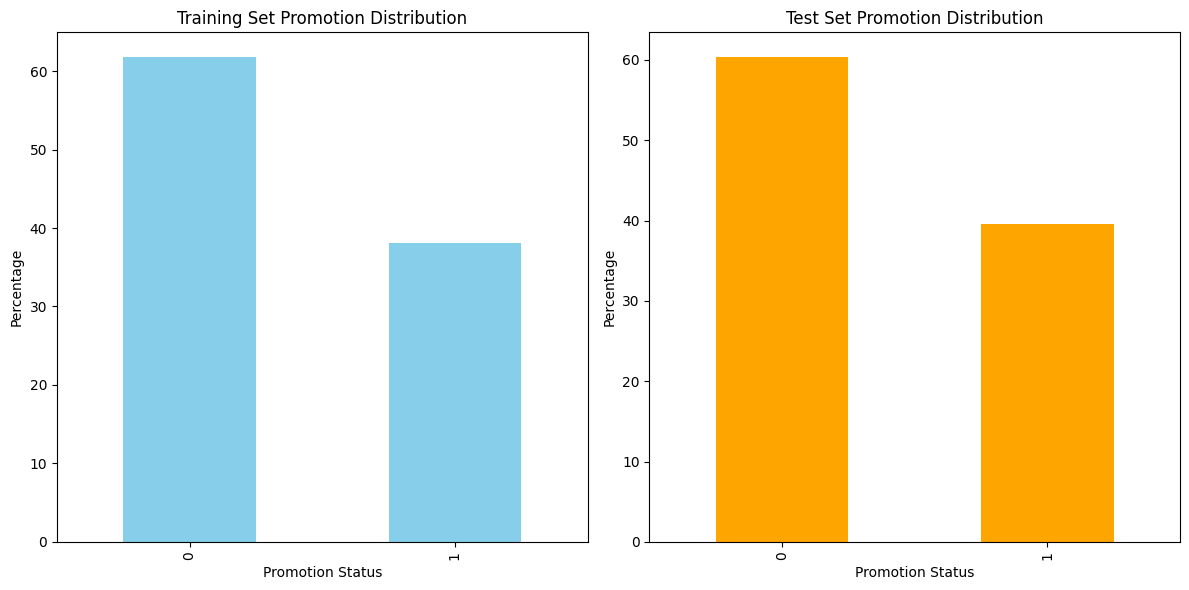

In [61]:
import matplotlib.pyplot as plt
import logging

# Initialize logger (assuming it has been set up as previously described)
logger = logging.getLogger(__name__)

logger.info("Checking columns in train and test datasets...")
logger.info(f"Train Columns: {list(train_data.columns)}")
logger.info(f"Test Columns: {list(test_data.columns)}")

# Assuming 'Promo' column represents promotions
if 'Promo' in train_data.columns and 'Promo' in test_data.columns:
    logger.info("'Promo' column found in both train and test datasets.")
    
    # Calculate distributions
    train_promo_dist = train_data['Promo'].value_counts(normalize=True) * 100
    test_promo_dist = test_data['Promo'].value_counts(normalize=True) * 100

    logger.info("Training Set Promotion Distribution:")
    logger.info(f"\n{train_promo_dist.to_string()}")
    logger.info("\nTest Set Promotion Distribution:")
    logger.info(f"\n{test_promo_dist.to_string()}")

    # Plot distributions
    logger.info("Plotting promotion distributions...")
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    train_promo_dist.plot(kind='bar', ax=ax[0], color='skyblue', title="Training Set Promotion Distribution")
    test_promo_dist.plot(kind='bar', ax=ax[1], color='orange', title="Test Set Promotion Distribution")

    ax[0].set_xlabel('Promotion Status')
    ax[0].set_ylabel('Percentage')
    ax[1].set_xlabel('Promotion Status')
    ax[1].set_ylabel('Percentage')

    plt.tight_layout()
    plt.show()
    logger.info("Promotion distribution plots displayed successfully.")
else:
    logger.warning("The 'Promo' column was not found in one or both datasets.")

In [62]:
from merge_data import merge_train_store

# Merge the datasets
merged_data = merge_train_store(TrainData, StoreData)

# Display the merged dataset
print(merged_data.head())

2025-01-03 15:03:05,879 - INFO - Merging the train and store datasets on the 'Store' column.


2025-01-03 15:03:06,554 - INFO - Merge completed. The merged dataset has 871135 rows and 18 columns.


   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      6          5  2015-07-31   5651        589     1      1            0   
4      8          5  2015-07-31   8492        833     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         a          a                310.0   
4              1         a          a               7520.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                   

In [63]:
merged_data.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2622
CompetitionOpenSinceMonth    277419
CompetitionOpenSinceYear     277419
Promo2                            0
Promo2SinceWeek              407388
Promo2SinceYear              407388
PromoInterval                407388
dtype: int64

In [64]:
from handle_missing_values import clean_missing_values

# Clean the missing values
cleaned_data = clean_missing_values(merged_data)

# Verify if there are any remaining missing values
print(cleaned_data.isnull().sum())

# Display the first few rows of the cleaned data
print(cleaned_data.head())

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      6          5  2015-07-31   5651        589     1      1            0   
4      8          5  2015-07-31   

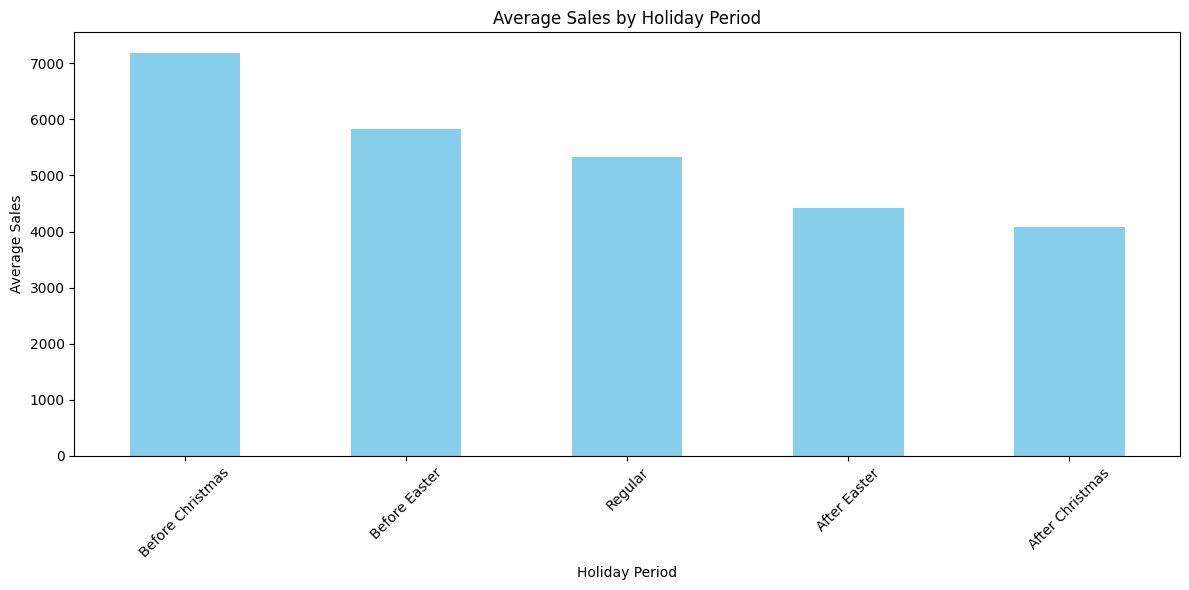

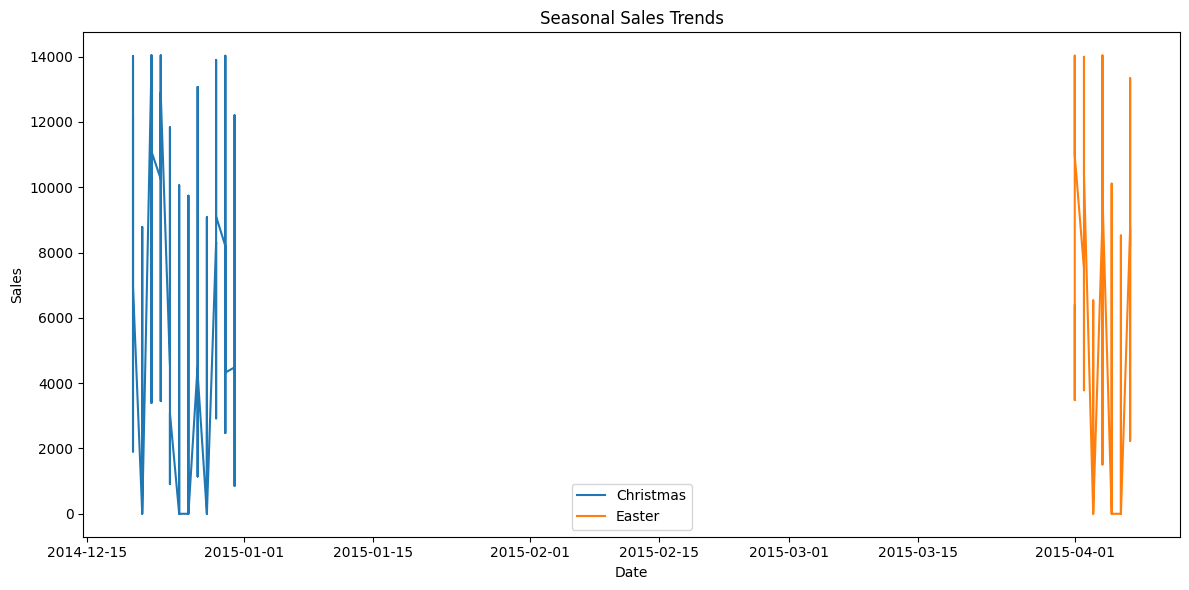

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import logging

# Initialize logger (assume logger is already set up as shown earlier)
logger = logging.getLogger(__name__)

# Ensure 'Date' column is in datetime format
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])
logger.info("Converted 'Date' column to datetime format.")

# Sort data by Date
cleaned_data = cleaned_data.sort_values('Date')
logger.info("Sorted cleaned data by 'Date'.")

# Define known holiday dates or ranges
holiday_dates = {
    'Christmas': pd.date_range('2014-12-20', '2014-12-31'),
    'Easter': pd.date_range('2015-04-01', '2015-04-07'),
    # Add other holidays as needed
}

# Initialize a HolidayPeriod column
cleaned_data['HolidayPeriod'] = 'Regular'

# Categorize periods based on holidays
for holiday, dates in holiday_dates.items():
    cleaned_data.loc[cleaned_data['Date'].isin(dates), 'HolidayPeriod'] = f'During {holiday}'
    cleaned_data.loc[cleaned_data['Date'].isin(dates - pd.Timedelta(days=3)), 'HolidayPeriod'] = f'Before {holiday}'
    cleaned_data.loc[cleaned_data['Date'].isin(dates + pd.Timedelta(days=3)), 'HolidayPeriod'] = f'After {holiday}'

logger.info("Categorized data into 'Before Holiday,' 'During Holiday,' and 'After Holiday' periods.")

# Group by HolidayPeriod and calculate average sales
holiday_sales = cleaned_data.groupby('HolidayPeriod')['Sales'].mean().sort_values(ascending=False)
logger.info("Calculated average sales for each holiday period.")
logger.info(f"\n{holiday_sales.to_string()}")

# Plot sales trends for holiday periods
plt.figure(figsize=(12, 6))
holiday_sales.plot(kind='bar', color='skyblue', title="Average Sales by Holiday Period")
plt.xlabel('Holiday Period')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
logger.info("Displayed sales trends for holiday periods.")

# Analyze seasonal purchase behavior
seasonal_data = cleaned_data[cleaned_data['HolidayPeriod'] != 'Regular']
plt.figure(figsize=(12, 6))
for holiday, dates in holiday_dates.items():
    holiday_sales_data = seasonal_data[seasonal_data['Date'].isin(dates)]
    plt.plot(holiday_sales_data['Date'], holiday_sales_data['Sales'], label=holiday)

plt.title("Seasonal Sales Trends")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()
logger.info("Displayed seasonal purchase behavior trends.")

Pearson Correlation Coefficient between Sales and Customers: 0.9117


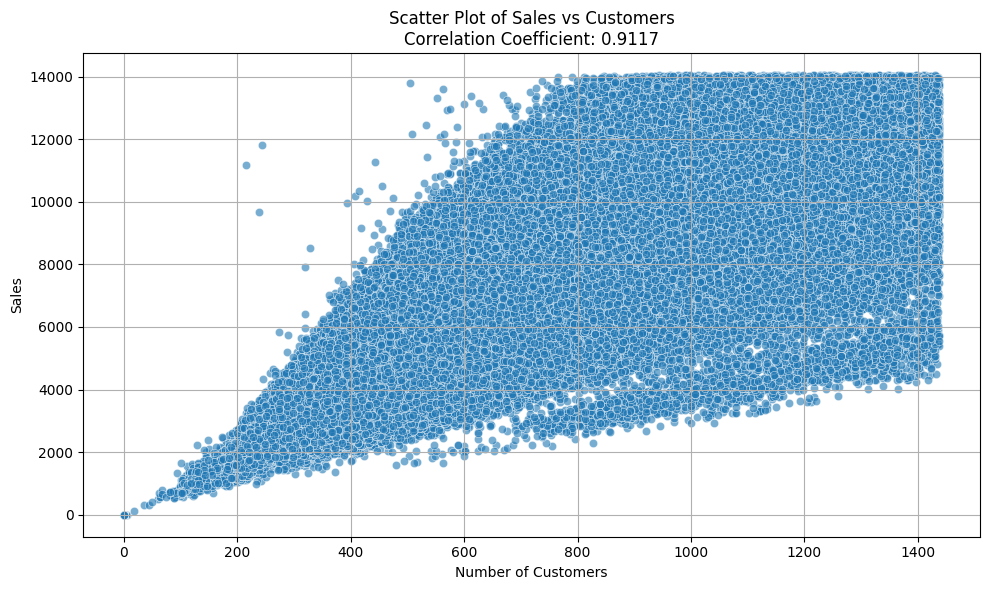

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation coefficient
correlation = cleaned_data['Sales'].corr(cleaned_data['Customers'])
logger.info(f"Calculated Pearson correlation coefficient: {correlation:.4f}")

# Display the result
print(f"Pearson Correlation Coefficient between Sales and Customers: {correlation:.4f}")

# Visualize the relationship using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cleaned_data['Customers'], y=cleaned_data['Sales'], alpha=0.6)
plt.title(f"Scatter Plot of Sales vs Customers\nCorrelation Coefficient: {correlation:.4f}")
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()
logger.info("Displayed scatter plot of Sales vs. Customers.")

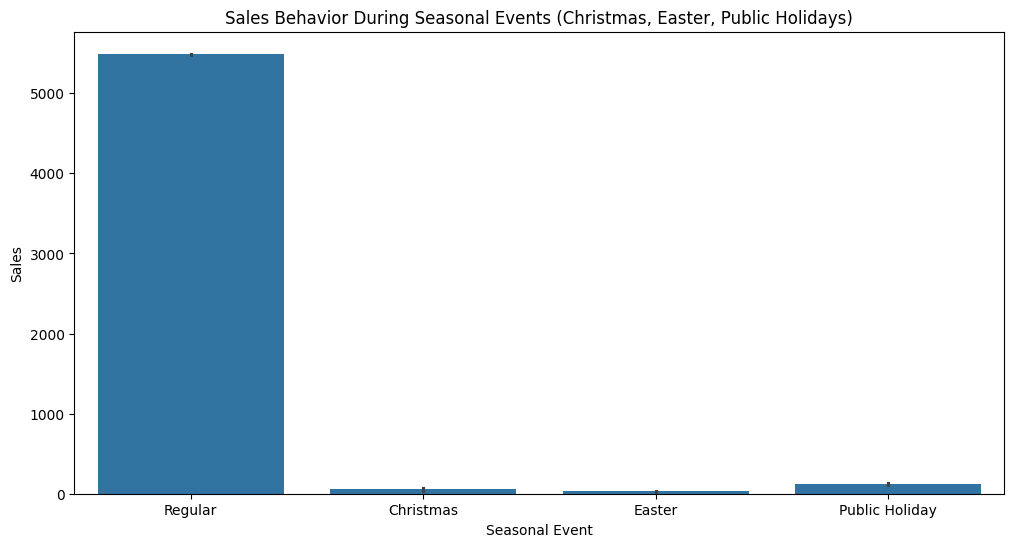

,mean,median,std,count
Season,,,,
Christmas,54.842436,0.0,595.079129,3662
Easter,28.912949,0.0,421.284825,5962
Public Holiday,116.861602,0.0,913.986665,18100
Regular,5486.049254,5664.0,3171.467088,843411


In [67]:
# Configure the logger
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

# Create a file handler to log to a file
file_handler = logging.FileHandler('sales_analysis.log')
file_handler.setLevel(logging.INFO)

# Create a stream handler to log to the notebook console
console_handler = logging.StreamHandler()
console_handler.setLevel(logging.INFO)

# Define a common formatter for both handlers
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')

def seasonal_purchase_behavior(merged_df, sales_column, date_column, state_holiday_column):
    """
    Analyze seasonal purchase behaviors (e.g., Christmas, Easter) using StateHoliday and other known dates.
    """
    logger.info("Starting seasonal purchase behavior analysis.")
    
    # Ensure date_column is in datetime format
    merged_df[date_column] = pd.to_datetime(merged_df[date_column])
    logger.info(f"Converted {date_column} to datetime format.")
    
    # Create a new column for seasonality
    merged_df['Season'] = 'Regular'

    # Define Christmas and Easter periods
    christmas_mask = merged_df[state_holiday_column] == 'c'
    easter_mask = merged_df[state_holiday_column] == 'b'
    logger.info("Defined Christmas and Easter masks.")

    # Define other common holiday periods if available
    public_holiday_mask = merged_df[state_holiday_column] == 'a'
    logger.info("Defined public holiday mask.")

    # Update the 'Season' column based on the holiday type
    merged_df.loc[christmas_mask, 'Season'] = 'Christmas'
    merged_df.loc[easter_mask, 'Season'] = 'Easter'
    merged_df.loc[public_holiday_mask, 'Season'] = 'Public Holiday'
    logger.info("Updated Season column based on holiday type.")

    # Plot seasonal behavior
    logger.info("Plotting sales behavior by season.")
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Season', y=sales_column, data=merged_df, order=['Regular', 'Christmas', 'Easter', 'Public Holiday'])
    plt.title('Sales Behavior During Seasonal Events (Christmas, Easter, Public Holidays)')
    plt.xlabel('Seasonal Event')
    plt.ylabel('Sales')
    plt.show()

    # Group by the season and summarize the sales behavior
    summary = merged_df.groupby('Season')[sales_column].agg(['mean', 'median', 'std', 'count'])
    logger.info(f"Sales Behavior Summary by Season:\n{summary}")

    return summary
sales_column = 'Sales'  
date_column = 'Date'    
state_holiday_column = 'StateHoliday'  

# Call the function to analyze seasonal purchase behaviors
seasonal_purchase_behavior(merged_data, sales_column, date_column, state_holiday_column)

Promo vs Non-Promo Average Sales and Customers:
         Avg Sales  Avg Customers
Promo                            
0      4109.836986     470.956703
1      7360.009990     740.251478
Sales per Customer on Promo vs Non-Promo Days:
Promo
0     8.990943
1    10.227949
Name: SalesPerCustomer, dtype: float64


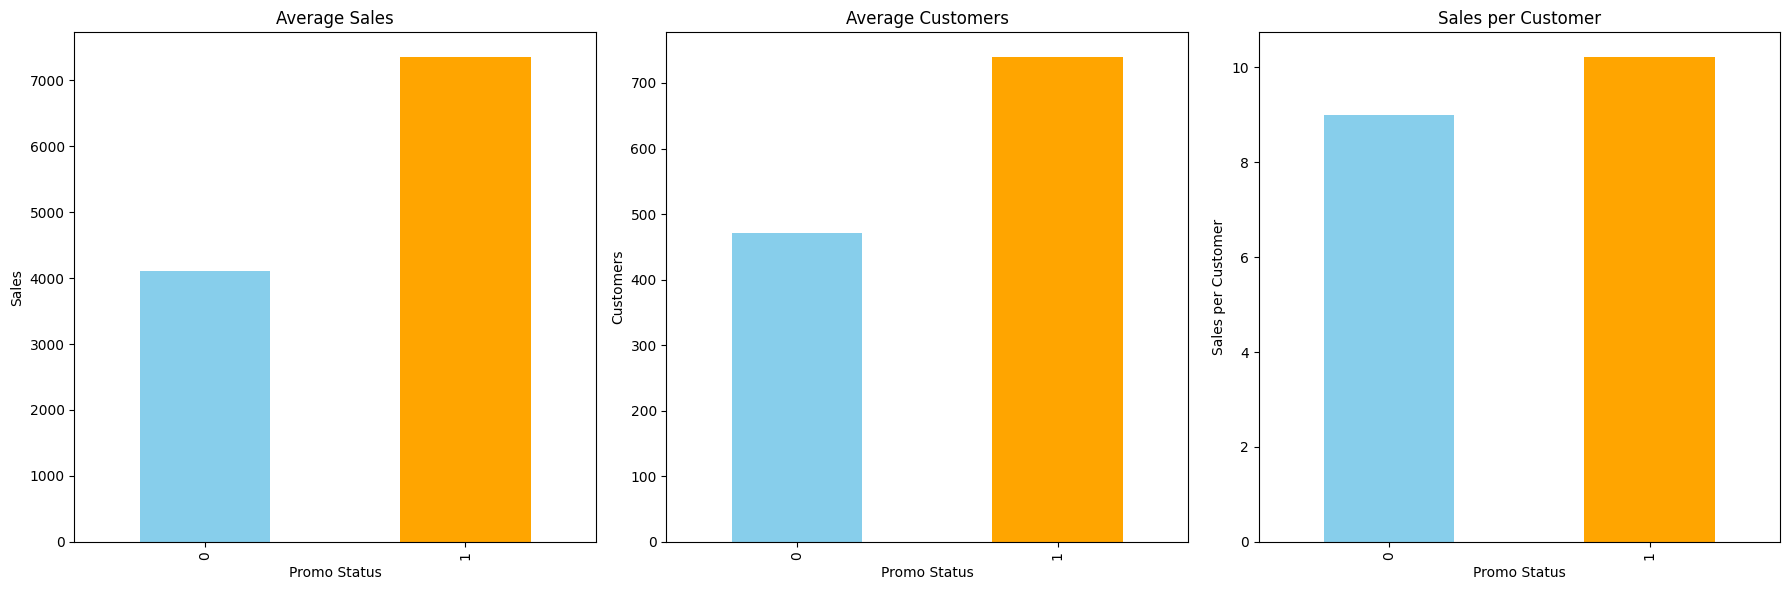

In [68]:
from promo_impact_analysis import analyze_promo_impact

analyze_promo_impact(cleaned_data)

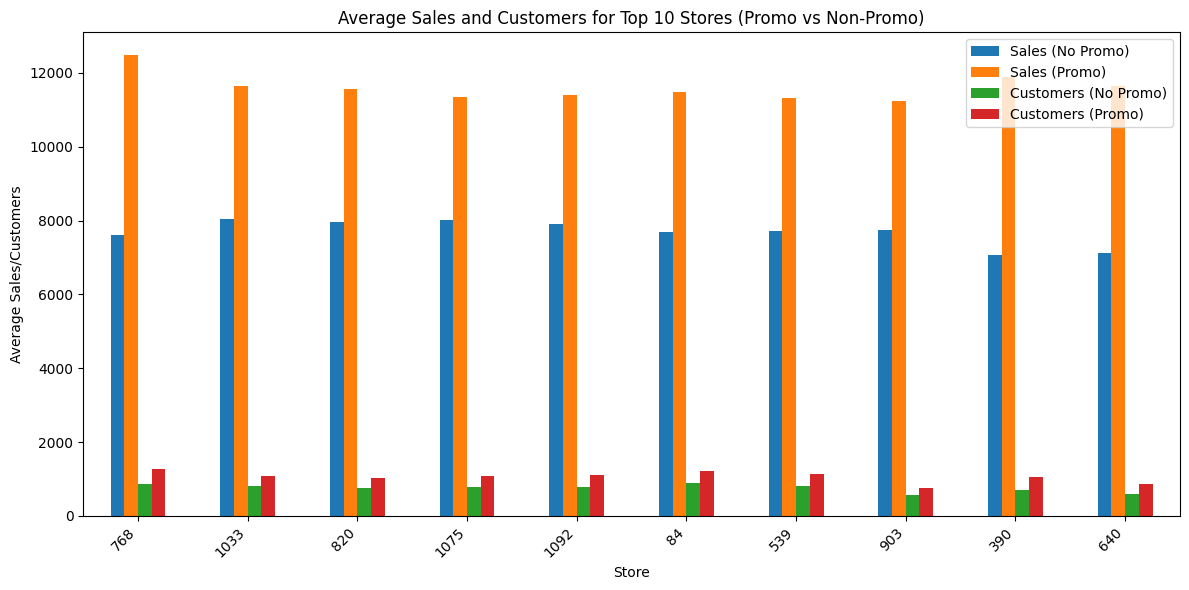

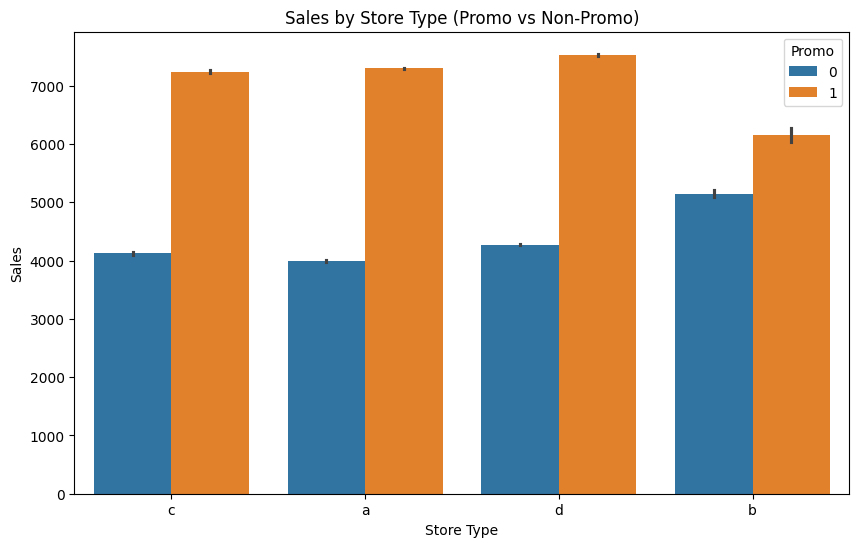


Promo Effectiveness Summary for Top 10 Stores (Sales and Customers):
                    Sales                      Customers                  
                    mean          std count        mean         std count
Store Promo                                                              
1     0      3198.994845  2052.472060   582  399.682131  250.880900   582
      1      5152.886111  1209.962568   360  577.522222  126.158363   360
2     0      2855.058419  1893.487434   582  366.876289  246.250761   582
      1      6172.816667  1421.844953   360  678.702778  138.557644   360
3     0      3949.535284  2565.501189   581  475.549053  307.214706   581
...                  ...          ...   ...         ...         ...   ...
1113  1      7320.086111  1625.789190   360  754.250000  145.336565   360
1114  0       244.212903  1512.013683   155   33.193548  205.191836   155
      1         0.000000     0.000000     7    0.000000    0.000000     7
1115  0      4082.221649  2735.274151   5

In [69]:
from analyze_by_top_stores import analyze_promo_by_top_stores

# Specify the sales, customers, promo, store, and store type columns
sales_column = 'Sales'  
customers_column = 'Customers'  
promo_column = 'Promo'  
store_column = 'Store' 
store_type_column = 'StoreType'  

# Call the function to analyze the effect of promotions by store and store type
analyze_promo_by_top_stores(merged_data, sales_column, customers_column, promo_column, store_column, store_type_column)

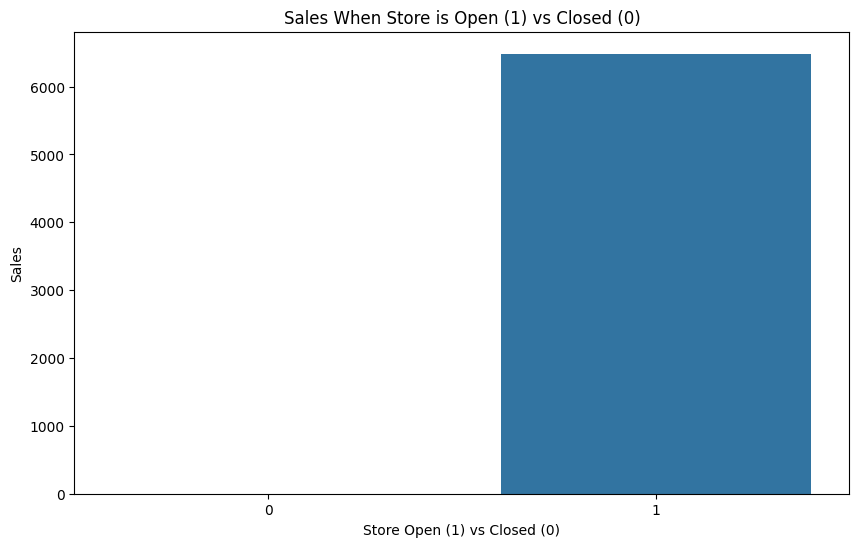

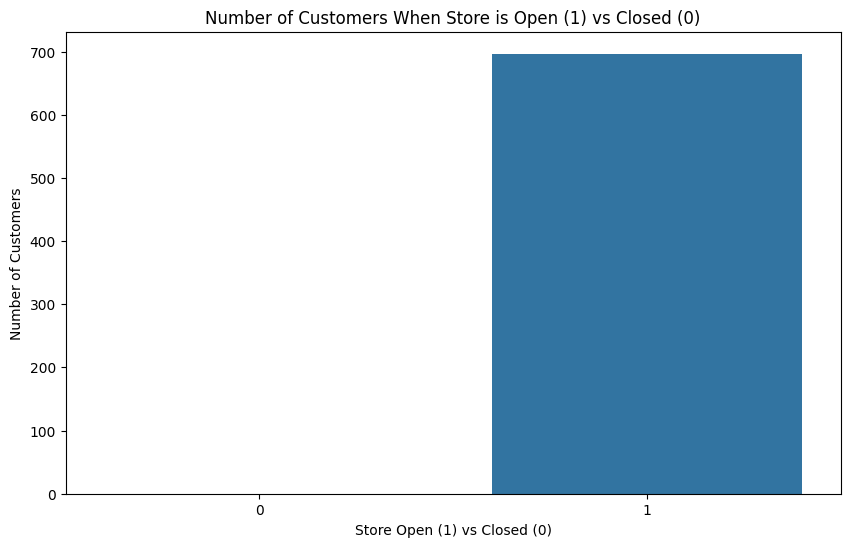

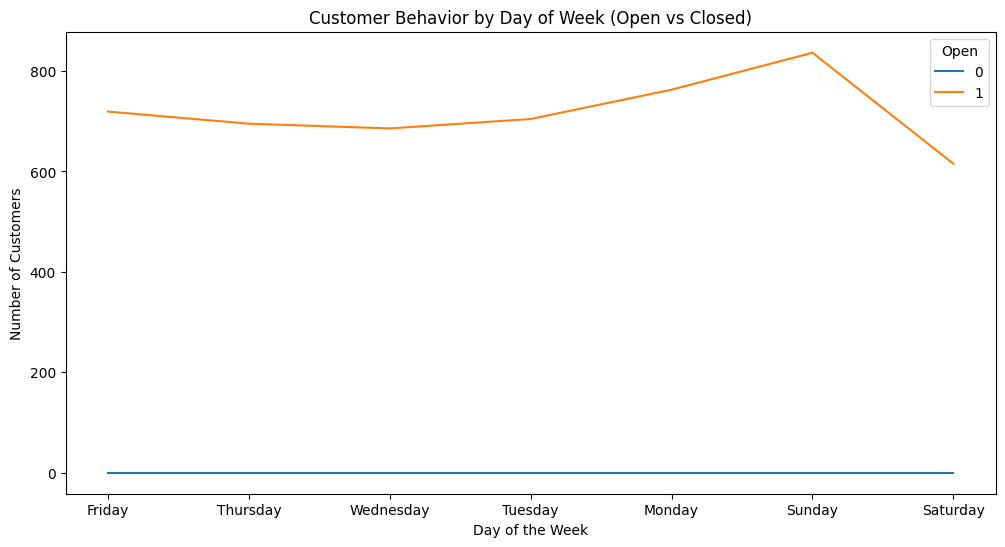

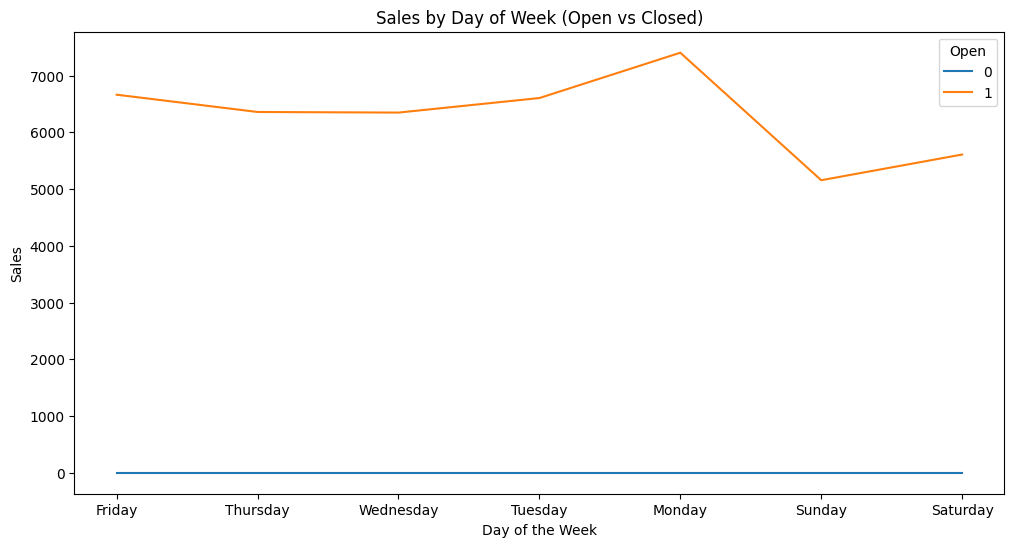


Store Opening and Closing Summary (Sales and Customers):
             Sales                                Customers                     \
             mean  median          std   count        mean median         std   
Open                                                                            
0        0.000000     0.0     0.000000  156698    0.000000    0.0    0.000000   
1     6479.903328  6176.0  2332.294572  714437  695.937974  658.0  250.064425   

              
       count  
Open          
0     156698  
1     714437  


In [76]:
from store_opening import analyze_store_opening_closing_behavior

sales_column = 'Sales'  
customers_column = 'Customers'  
open_column = 'Open' 
date_column = 'Date'  

# Call the function to analyze customer behavior during store opening and closing times
analyze_store_opening_closing_behavior(merged_data, sales_column, customers_column, open_column, date_column)

Number of stores open on all weekdays: 989


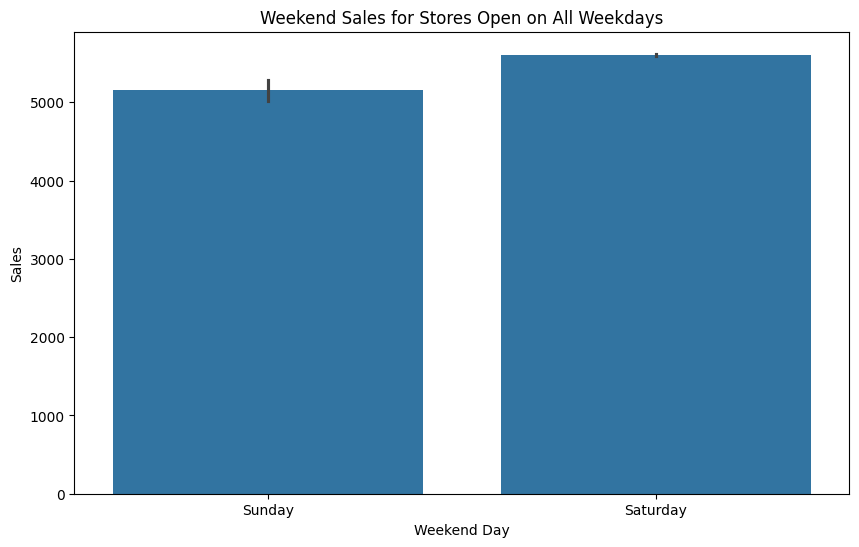


Weekend Sales Summary for Stores Open on All Weekdays:
                   mean  median          std   count
DayOfWeek                                          
Saturday   5606.616280  5351.0  2274.888383  124192
Sunday     5155.401589  5432.0  2218.431660    1133


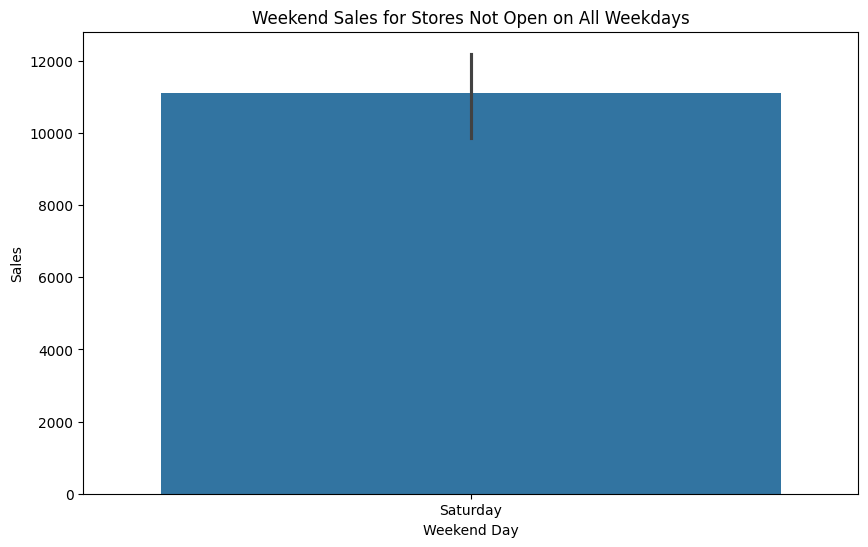


Weekend Sales Summary for Stores Not Open on All Weekdays:
                    mean   median          std  count
DayOfWeek                                           
Saturday   11111.586207  13071.0  3193.397793     29


In [71]:
from weekend_sales import analyze_weekday_open_stores_and_weekend_sales

sales_column = 'Sales'  
date_column = 'Date'
store_column = 'Store'  

# Call the function to analyze stores open on all weekdays and their weekend sales
analyze_weekday_open_stores_and_weekend_sales(merged_data, sales_column, date_column, store_column)

['a' 'c' 'b']
                   mean  median          std   count
Assortment                                          
a           5116.394943  5322.0  3171.259521  470491
b           4345.892464  4445.5  1392.636246    2362
c           5553.853609  5854.0  3362.299587  398282


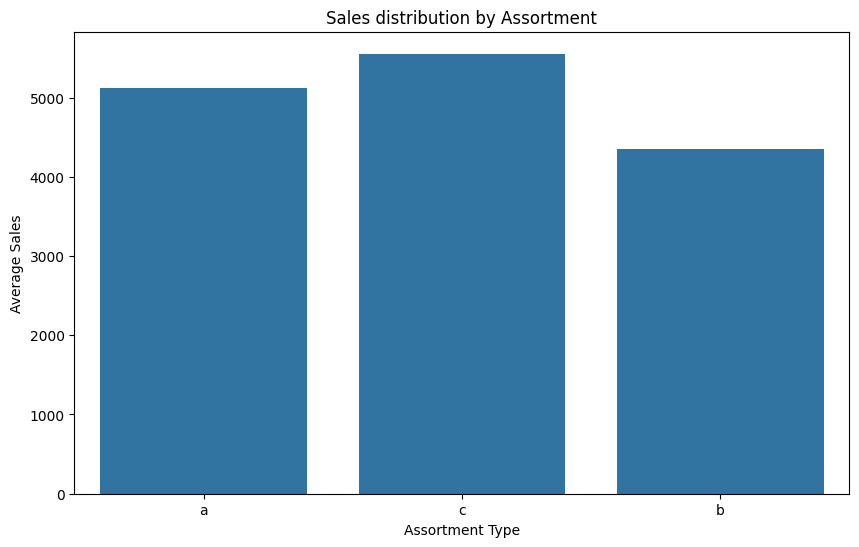

In [72]:
# Check unique values in the Assortment column to understand its categories
print(merged_data['Assortment'].unique())

assortment_sales = merged_data.groupby('Assortment')[sales_column].agg(['mean', 'median', 'std', 'count'])
print(assortment_sales)

# Visualize the mean sales for each assortment type
plt.figure(figsize=(10, 6))
sns.barplot(x='Assortment', y=sales_column, data=merged_data, ci=None)
plt.title('Sales distribution by Assortment')
plt.xlabel('Assortment Type')
plt.ylabel('Average Sales')
plt.show()

Correlation between CompetitionDistance and Sales: 0.0320


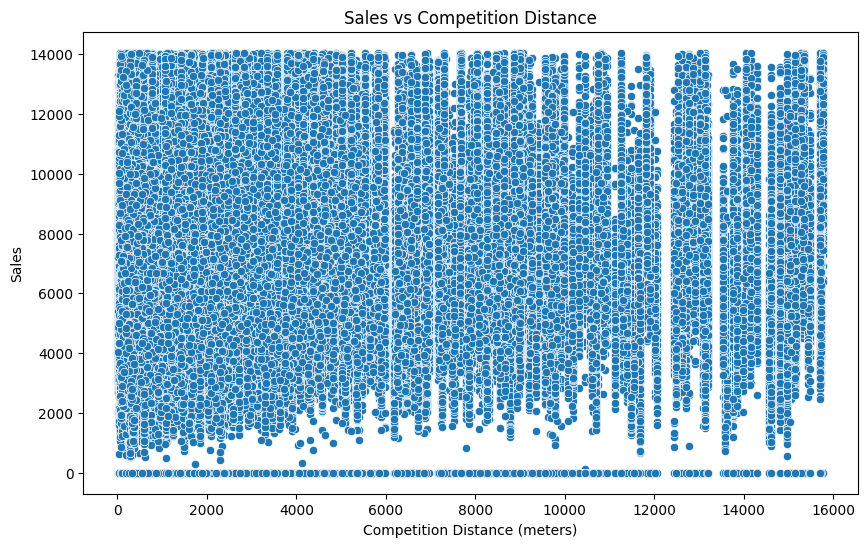

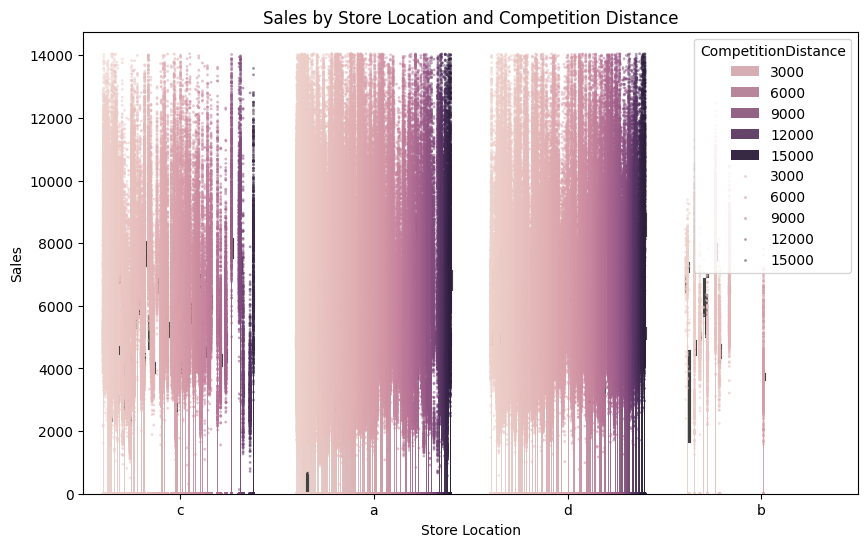


Sales Summary by Competition Distance and Store Location:
                                       mean   median          std  count
CompetitionDistance StoreType                                          
20.0                a          4851.175345   4902.0  2752.166024    941
30.0                a          4648.482190   4992.5  2531.160222   3762
40.0                a          5750.861867   6210.0  3484.622872   3417
                    c          5318.945802   5312.0  3006.384869    941
50.0                a          3768.781825   3400.0  3223.836272   2663
...                                    ...      ...          ...    ...
15490.0             d          5675.804255   6210.0  2925.678123    940
15700.0             a          6033.584881   6704.5  3263.732468    754
15710.0             a          6834.602535   7463.5  4155.176930    868
15720.0             d          5122.308917   5587.0  2647.748826    942
15770.0             d          8611.521307  10119.0  4477.906692    704

[72

In [77]:
from competitor_distance import analyze_competitor_distance_effect_on_sales

sales_column = 'Sales'  
competition_distance_column = 'CompetitionDistance'  
store_type_column = 'StoreType'

# Call the function to analyze how the distance to competitors affects sales
analyze_competitor_distance_effect_on_sales(merged_data, sales_column, competition_distance_column, store_type_column)

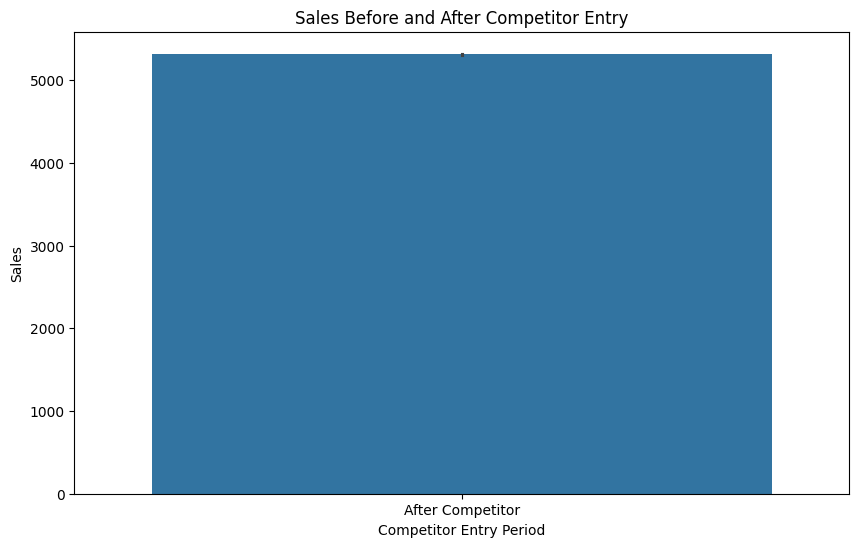

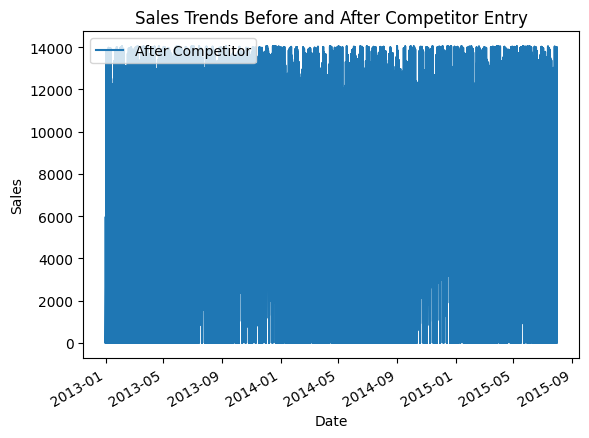


Sales Summary Before and After Competitor Entry:
                          mean  median          std   count
TimePeriod                                                
After Competitor  5314.311437  5559.0  3264.269965  871135


In [78]:
from competitors_effect_on_sales import analyze_new_competitors_effect_on_sales

sales_column = 'Sales'  
competition_distance_column = 'CompetitionDistance'  
date_column = 'Date'  
store_column = 'Store'  

# Call the function to analyze the effect of new competitors on sales
analyze_new_competitors_effect_on_sales(merged_data, sales_column, competition_distance_column, date_column, store_column)